<a href="https://colab.research.google.com/github/piyushchouhan/Machine-Learning-Coursera/blob/main/Non_Linear_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

first some light on linear equation


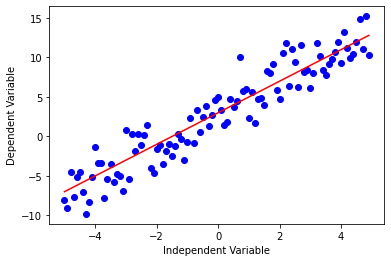

In [ ]:
x = np.arange(-5, 5, 0.1)
# lets eqn of line is
y = 2*(x) + 3
y_noise = 2 * np.random.normal(size=x.size)
ydata = y+ y_noise
plt.plot(x, ydata, 'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

Some Examples for Non linearity

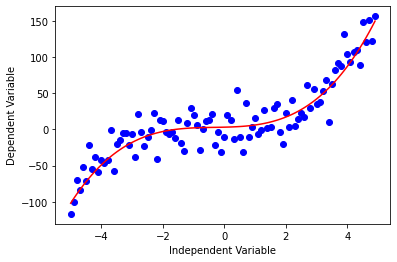

In [ ]:
#Cubic Function graph
x = np.arange(-5.0, 5.0, 0.1)

y = 1*(x**3) + 1*(x**2) + 1*x + 3
y_noise = 20 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

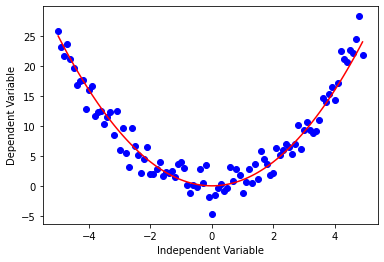

In [ ]:
#Quadratic function
x = np.arange(-5.0, 5.0, 0.1)

y = np.power(x,2)
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

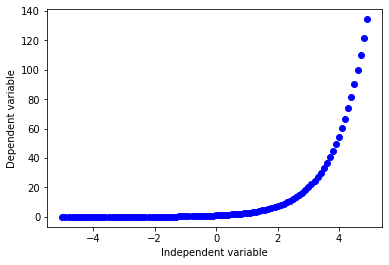

In [ ]:
#for Exponential
x = np.arange(-5,5,0.1)
y = np.exp(x)
plt.plot(x, y, 'bo')
plt.ylabel("Dependent variable")
plt.xlabel("Independent variable")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


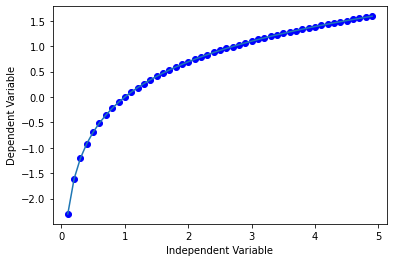

In [ ]:
#lograthtmic curve
X = np.arange(-5.0, 5.0, 0.1)

Y = np.log(X)
plt.plot(X, Y,  'bo')
plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

$$ Y = a + \frac{b}{1+ c^{(X-d)}}$$

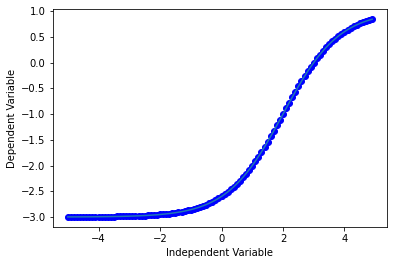

In [ ]:
X = np.arange(-5.0, 5.0, 0.1)

Y = 1-4/(1+np.power(3, X-2))
plt.plot(X, Y,  'bo')
plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

**Non-Linear Regression example**


For an example, we're going to try and fit a non-linear model to the datapoints corresponding to China's GDP from 1960 to 2014. We download a dataset with two columns, the first, a year between 1960 and 2014, the second, China's corresponding annual gross domestic income in US dollars for that year.

In [ ]:
!wget -nv -O china_gdp.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/china_gdp.csv
    
df = pd.read_csv("china_gdp.csv")
df.head(10)

2021-12-06 14:21:36 URL:https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/china_gdp.csv [1218/1218] -> "china_gdp.csv" [1]


,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


**Plotting the dataset**

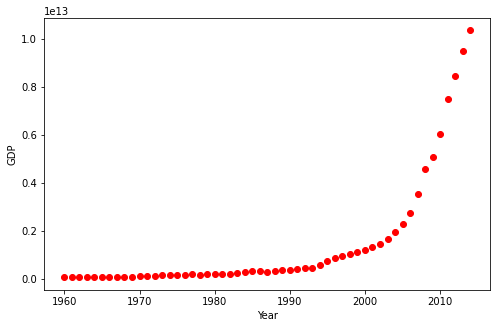

In [ ]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["Year"].values, df["Value"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

This is what the datapoints look like. It kind of looks like an either logistic or exponential function.

**Choosing a model**

From an initial look at the plot, we determine that the logistic function could be a good approximation, since it has the property of starting with a slow growth, increasing growth in the middle, and then decreasing again at the end

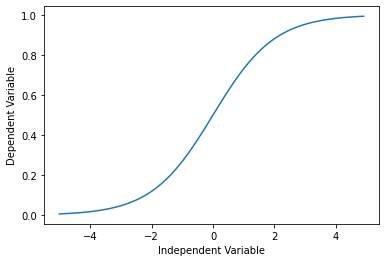

In [ ]:
#logistic curve 
X = np.arange(-5.0, 5.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

The formula for the logistic function is the following:

$$ \hat{Y} = \frac1{1+e^{\beta\_1(X-\beta\_2)}}$$

$\beta\_1$: Controls the curve's steepness,

$\beta\_2$: Slides the curve on the x-axis.

**Building the model**

In [ ]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

Lets look at a sample sigmoid line that might fit with the data:

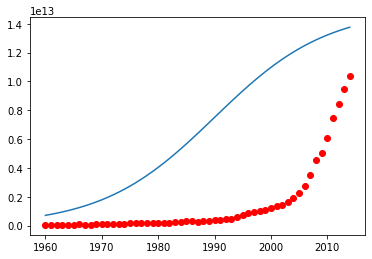

In [ ]:
beta_1 = 0.10
beta_2 = 1990
#logistic function
Y_pred = sigmoid(x_data, beta_1 , beta_2)

#plot initial prediction against datapoints
plt.plot(x_data, Y_pred*15000000000000)
plt.plot(x_data, y_data, 'ro')

Our task here is to find the best parameters for our model. Lets first normalize our x and y:

In [ ]:
# Lets normalize our data
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

How we find the best parameters for our fit line?
we can use curve_fit which uses non-linear least squares to fit our sigmoid function, to data. Optimize values for the parameters so that the sum of the squared residuals of sigmoid(xdata, *popt) - ydata is minimized.

popt are our optimized parameters.

In [ ]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.453017, beta_2 = 0.997207


Now we plot our resulting regression model.

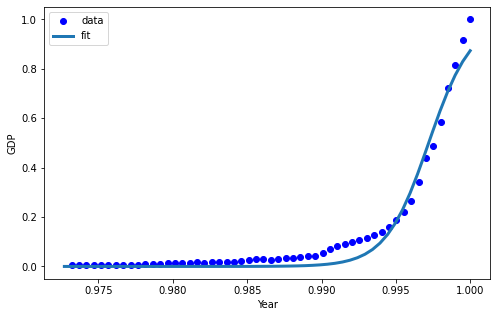

In [ ]:
x = np.linspace(1960, 2015,55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'bo', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()